In this notebook, I am going through the excercises from the Andrew Ng's Coursera ML course (https://www.coursera.org/learn/machine-learning) using Python standard libraries.

I will try to use standard functions from `scikit-learn` as much as possible.

In [1]:
!pwd
!git status

/c/checkouts/ig/coursera-ml
On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ML in python.ipynb
	modified:   ml_utils.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	Untitled.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [2]:
basepath = 'ex-files/'

### Usual imports

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# plot style
# Option 1a/b:
"""
plt.style.use('dark_background')
#plt.style.use('seaborn-white')
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
plt.rc('text', usetex=False)
"""
# Option 2:
from jupyterthemes import jtplot
jtplot.style(theme='grade3', gridlines=':')

In [5]:
from scipy.io import loadmat
from pandas.plotting import scatter_matrix


### scikit-learn imports

In [6]:
from sklearn import datasets

# feature manipulation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# models
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier

# pipelines
from sklearn.pipeline import Pipeline

# metrics and cross-validation
from sklearn.metrics import mean_squared_error, r2_score

### my helper functions

In [7]:
from ml_utils import *

# Ex1: Linear Regression

In [8]:
file1 = basepath + 'ex1/ex1data1.txt'
file2 = basepath + 'ex1/ex1data2.txt'

## Part 1: one variable
see http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

### Import and plot the dataset

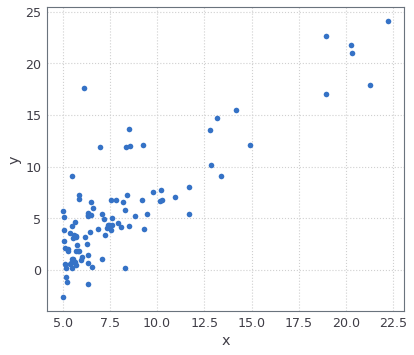

In [9]:
df = pd.read_csv(file1, header=None, names=['x', 'y']);
df = df
#print df.head(3)
plt.plot(df.x, df.y, 'o')
plt.xlabel('x')
plt.ylabel('y');

### Split data into training and test set (optional)

In [10]:
train_fraction = 0.5 # fraction of samples to use for training
np.random.seed(0)
msk = np.random.rand(len(df)) < train_fraction
# this creates two slices (not copies!) of `df`
df_train = df[msk]
df_test = df[~msk]
print 'Samples total: ', len(df)
print 'Samples train: ', len(df_train)
print 'Samples test:  ', len(df_test)
plt.plot(df_train.x, df_train.y, 'go', label='train')
plt.plot(df_test.x, df_test.y, 'ro', label='test')
plt.xlabel('x');
plt.ylabel('y');
plt.legend()

Samples total:  97
Samples train:  49
Samples test:   48


### Fit using linear regression
This could also be done with `numpy.polyfit`, but we use `sklearn.linear_mode.LenearRegression` functions to introduce the API.

Slope: 1.20, Intercept: -4.59
Train set MSE: 5.33, metrics.R2: 0.81, regr.R2: 0.81
Test set  MSE: 13.57, metrics.R2: 0.56, regr.R2: 0.56


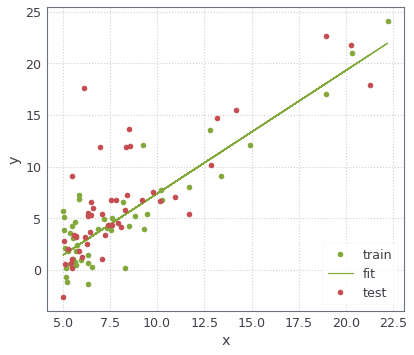

In [11]:
regr = LinearRegression()
x = df.x.values.reshape(-1, 1)
train_x = df_train.x.values.reshape(-1, 1)
train_y = df_train.y.values.reshape(-1, 1)
test_x = df_test.x.values.reshape(-1, 1)
test_y = df_test.y.values.reshape(-1, 1)
regr.fit(train_x, train_y)
## The coefficients
print 'Slope: %.2f, Intercept: %.2f' % (regr.coef_, regr.intercept_)

# predict for all samples
df['f'] = regr.predict(x)
# reload slices to get f
df_train = df[msk]
df_test = df[~msk]
train_f = df_train.f.values.reshape(-1, 1)
test_f = df_test.f.values.reshape(-1, 1)
# compute scores on train and test sets

## The mean squared error and R2 score
# R2 score can be computed using `regr.score()` or `sklearn.metrics.r2_score()`
try:
    train_mse = mean_squared_error(train_y, train_f)
    train_r2 = r2_score(train_y, train_f)
    train_r2_alt = regr.score(train_x, train_y)
    print 'Train set MSE: %.2f, metrics.R2: %.2f, regr.R2: %.2f' % (train_mse, train_r2, train_r2_alt)
except:
    pass
try:
    test_mse = mean_squared_error(test_y, test_f)
    test_r2 = r2_score(test_y, test_f)
    test_r2_alt = regr.score(test_x, test_y)
    print 'Test set  MSE: %.2f, metrics.R2: %.2f, regr.R2: %.2f' % (test_mse, test_r2, test_r2_alt)
except:
    pass
# Plot
plt.plot(df_train.x, df_train.y, 'go', label='train')
plt.plot(df.x, df.f, 'g-', label='fit')
plt.plot(df_test.x, df_test.y, 'ro', label='test')
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc=4);

## Part 2: multiple variables

### Import and visualize data

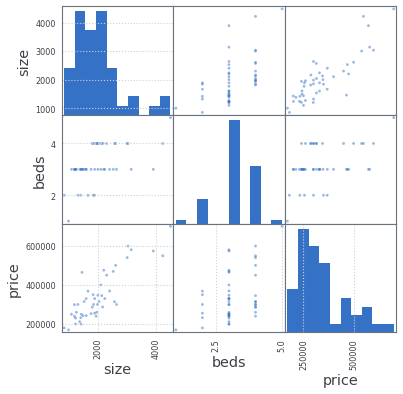

In [12]:
df = pd.read_csv(file2, header=None, names=['size', 'beds', 'price']);
df.describe(percentiles=[])
scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='hist');

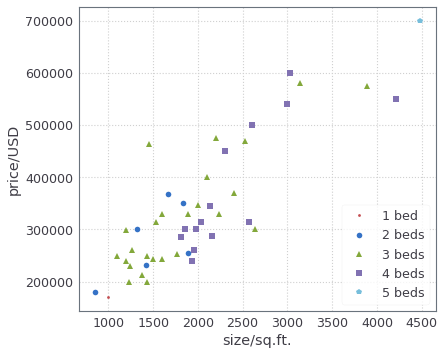

In [13]:
styles = [
    'r.',
    'bo',
    'g^',
    'ms',
    'cp',
    'wh'
    
]
for bed in sorted(df['beds'].unique()):
    df_sub = df[df['beds'] == bed]
    label = '%d bed%s' % (bed, '' if bed==1 else 's')
    style = styles[bed-1]
    plt.plot(df_sub['size'], df_sub['price'], style, label=label)
plt.legend(loc=4);
plt.xlabel('size/sq.ft.')
plt.ylabel('price/USD')

### Feature normalization
Normalize features using `sklearn.preprocessing.StandardScaler`
**NB** `Normalizer` scales each sample individually!!!

In [14]:
scaler = StandardScaler()

In [15]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

size          beds         price
count  4.700000e+01  4.700000e+01  4.700000e+01
mean  -9.448707e-18  2.427137e-16 -6.614095e-17
std    1.010811e+00  1.010811e+00  1.010811e+00
min   -1.461049e+00 -2.882690e+00 -1.378409e+00
50%   -1.433229e-01 -2.260934e-01 -3.275006e-01
max    3.150993e+00  2.430504e+00  2.906063e+00

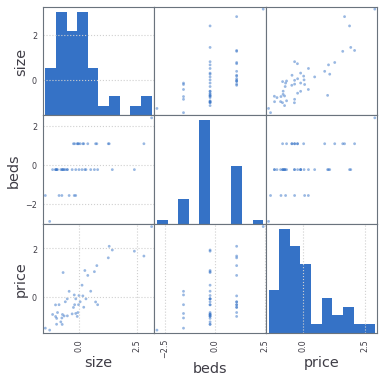

In [16]:
scatter_matrix(df_scaled, alpha=0.5, figsize=(6, 6), diagonal='hist')
#plt.plot(df.x, df.y, 'rx')
#plt.xlabel('x')
#plt.ylabel('y')
df_scaled.describe(percentiles=[])

### perform linear regression on scaled features

In [17]:
scaled_x = df_scaled[['size', 'beds']].values.reshape(-1, 2)
scaled_y = df_scaled['price'].values.reshape(-1, 1)

In [18]:
regr = LinearRegression()
regr.fit(scaled_x, scaled_y)
## The coefficients
print 'Slopes: %s, Intercept: %s' % (regr.coef_, regr.intercept_)

Slopes: [[ 0.88476599 -0.05317882]], Intercept: [ -6.00862017e-17]


### Combine scaling and regression

In [19]:
n_features = 2

In [20]:
# x values to be used for prediction
test_x = [[1650, 3]]
# add y column for compatibility with scaler
test_x_y = np.hstack([test_x, np.zeros((np.size(test_x, 0), 1))])
# scale
test_x_y_scaled = scaler.transform(test_x_y)
# apply model on scaled values
test_x_y_scaled[:, n_features] = regr.predict(test_x_y_scaled[:, :n_features])
# inverse transform
test_x_y = scaler.inverse_transform(test_x_y_scaled)

#
test_x_y

array([[  1.65000000e+03,   3.00000000e+00,   2.93081464e+05]])

### ToDo
- [x] visualize fit (3D or 2D per-bed-nr)
- scale (input) features only for consistency
- use sklearn pipeline to perform fitting

# Ex 2: Logistic Regression
See e.g. `http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py`

In [21]:
file1 = basepath + 'ex2/ex2data1.txt'
file2 = basepath + 'ex2/ex2data2.txt'

## Part 1: Logistic regression, linear decision boundary

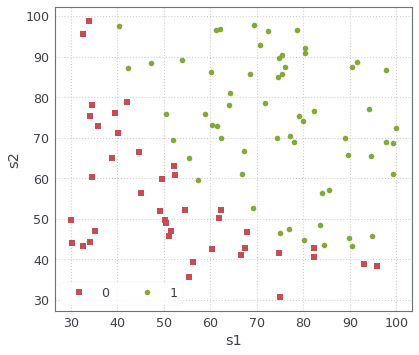

In [22]:
df = pd.read_csv(file1, header=None, names=['s1', 's2', 'adm'])
df.describe(percentiles=[])
for adm, style in zip([0, 1], ['rs', 'go']):
    sub_df = df[df.adm==adm]
    plt.plot(sub_df.s1, sub_df.s2, style, label='%d' % adm)
plt.legend(ncol=2)
plt.xlabel('s1')
plt.ylabel('s2')

### Train on full dataset

In [23]:
X = df[['s1', 's2']].values
y = df['adm'].values

## Large C means no regularization!
regr = LogisticRegression(C=1e10)
regr.fit(X, y)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

[[ 0.20459008  0.19981009]] [-24.9560464]


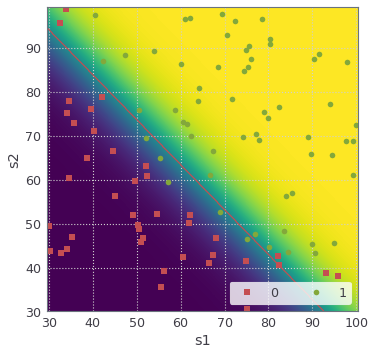

In [24]:
h = .1;

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
Z = regr.predict(X)
P = regr.predict_proba(X)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
P0 = P[:,0].reshape(xx.shape)
P1 = P[:,1].reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='r')
plt.imshow(P1, extent=(x_min, x_max, y_min, y_max), 
           origin='lower', cmap=plt.cm.viridis, interpolation='bilinear')
for adm, style in zip([0, 1], ['rs', 'go']):
    sub_df = df[df.adm==adm]
    plt.plot(sub_df.s1, sub_df.s2, style, label='%d' % adm)
plt.legend(ncol=2)
plt.xlabel('s1')
plt.ylabel('s2')
print regr.coef_, regr.intercept_

## Part 2: Polynomial features and Pipelines

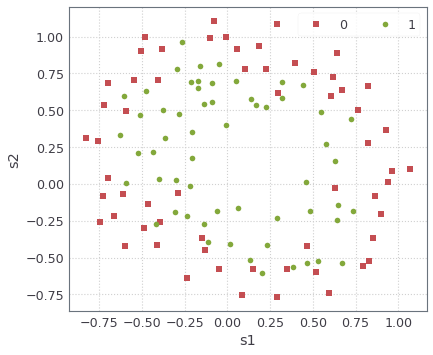

In [25]:
df = pd.read_csv(file2, header=None, names=['s1', 's2', 'adm'])
df.describe(percentiles=[])
for adm, style in zip([0, 1], ['rs', 'go']):
    sub_df = df[df.adm==adm]
    plt.plot(sub_df.s1, sub_df.s2, style, label='%d' % adm)
plt.legend(ncol=2)
plt.xlabel('s1')
plt.ylabel('s2')

### Train on full dataset

In [26]:
X = df[['s1', 's2']].values
y = df['adm'].values
# Example: degree=10, C=1e10 will overfit massively!!!
degree = 6
C = 1e10
model = Pipeline([('poly', PolynomialFeatures(degree=degree)), 
                  ('LR', LogisticRegression(C=C, fit_intercept=False))])

model.fit(X, y)
score = model.score(X, y)
print score

0.889830508475


C:\Conda\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


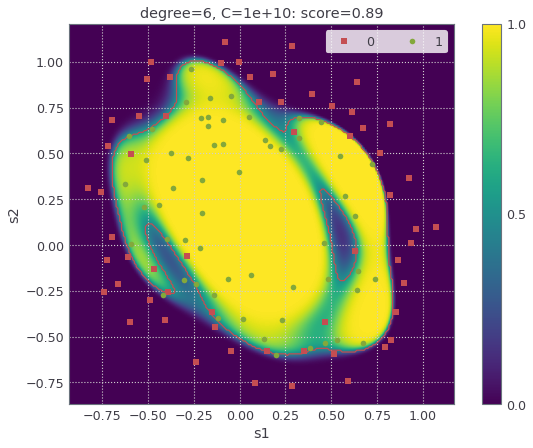

In [27]:
h = .01;
margin = 0.1
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(X)
Z = Z.reshape(xx.shape)
P = model.predict_proba(X)
P0 = P[:,0].reshape(xx.shape)
P1 = P[:,1].reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contour(xx, yy, Z, colors='r', levels=[0.5])
plt.imshow(P1, extent=(x_min, x_max, y_min, y_max), 
           origin='lower', cmap=plt.cm.viridis, interpolation='bilinear')
for adm, style in zip([0, 1], ['rs', 'go']):
    sub_df = df[df.adm==adm]
    plt.plot(sub_df.s1, sub_df.s2, style, label='%d' % adm)
plt.legend(ncol=2)
plt.xlabel('s1')
plt.ylabel('s2')
plt.colorbar(ticks=[0, 0.5, 1])
plt.title('degree=%d, C=%.0e: score=%.2f' % (degree, C, score));

# Ex 4: Neural Networks

## Import and plot data

In [28]:
file_digits = basepath + 'ex4/ex4data1.mat'
file_weights = basepath + 'ex4/ex4weights.mat'

In [29]:
digits = loadmat(file_digits)
weights = loadmat(file_weights)

In [30]:
for d in [digits, weights]:    
    for k, v in sorted(d.iteritems()):
        if k.startswith('__'):
            continue
        print k, np.shape(v)

X (5000L, 400L)
y (5000L, 1L)
Theta1 (25L, 401L)
Theta2 (10L, 26L)


In [31]:
X, y = digits['X'], digits['y'].flatten()
y[y==10] = 0
side = 20
assert X.shape[1] == side*side

In [32]:
def show_random_digits(X, y, how_many=16, idx=None, seed=None):
    # helper function to plot a specified or random subset of digits
    np.random.seed(seed)
    if idx is None:
        idx = np.random.choice(len(X), how_many)
    subset = X[idx,:]
    #_, subset = np.meshgrid(np.linspace(0, 0, 400), np.linspace(0, 1, 4))
    n_samples = subset.shape[0]
    grid_side = int(np.ceil(np.sqrt(n_samples)))
    grid_sides = (grid_side, grid_side)
    image_sides = (grid_sides[0]*side, grid_sides[1]*side)
    n_grid = grid_sides[0] * grid_sides[1]
    if n_samples < n_grid:
        subset = np.vstack([subset, np.zeros((n_grid - n_samples, subset.shape[1]))])
    subset = subset.reshape((grid_sides[0], grid_sides[1], side, side)).swapaxes(1, 2).reshape((image_sides[0], image_sides[1])).T
    plt.imshow(subset, cmap=plt.cm.Greys_r)
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    disp_y = np.ones((n_grid,))*np.nan
    disp_y[:n_samples] = y[idx]
    return disp_y.reshape((grid_sides[0], grid_sides[1])).T

[[ 1.  8.  4.  7.  6.  1.  5.  7.  7.  8.]
 [ 2.  3.  2.  3.  3.  9.  4.  3.  5.  1.]
 [ 2.  4.  0.  8.  9.  6.  3.  6.  0.  2.]
 [ 3.  0.  4.  6.  9.  8.  5.  9.  9.  6.]
 [ 6.  8.  4.  9.  5.  3.  6.  2.  3.  8.]
 [ 0.  4.  3.  6.  0.  0.  8.  4.  1.  1.]
 [ 5.  4.  5.  2.  6.  6.  0.  2.  2.  6.]
 [ 2.  0.  4.  9.  0.  5.  2.  3.  3.  3.]
 [ 7.  5.  6.  5.  2.  9.  8.  8.  2.  1.]
 [ 0.  2.  9.  2.  9.  6.  0.  0.  9.  2.]]


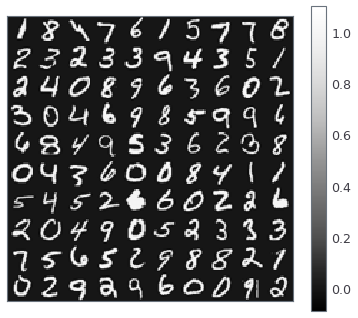

In [33]:
print show_random_digits(X, y, how_many=100)

## Train a neural network to classify digits

In [34]:
model = MLPClassifier(hidden_layer_sizes=(25))

In [35]:
%%time
model.fit(X, y)
print model.score(X, y)

0.9984
Wall time: 13.5 s


C:\Conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Identify and inspect mis-classified examples

In [36]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [37]:
f = model.predict(X)

In [38]:
failed_idx = (y != f)
print 'Misclasified: ', np.count_nonzero(failed_idx)

Misclasified:  8


array([[  2.,   4.,   8.],
       [  3.,   5.,   8.],
       [  3.,   8.,  nan]])

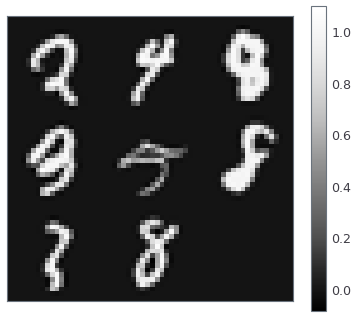

In [39]:
# ground truth
show_random_digits(X, y, idx=failed_idx)

# Ex 5: Choosing regularization meta-parameter

## Import and plot data

In [40]:
file_data = basepath + 'ex5/ex5data1.mat'
data = loadmat(file_data)

In [41]:
data.keys()

['ytest',
 'yval',
 '__header__',
 '__globals__',
 'Xtest',
 'Xval',
 'y',
 'X',
 '__version__']

In [42]:
# Hacky way to get vars into workspace
from numpy import array
for k, v in sorted(data.iteritems()):
    if k.startswith('__'):
        continue
    print '%-10s %s' % (k, np.shape(v))
    exec('%s = %r' % (k, v))
Xtrain = X
ytrain = y

X          (12L, 1L)
Xtest      (21L, 1L)
Xval       (21L, 1L)
y          (12L, 1L)
ytest      (21L, 1L)
yval       (21L, 1L)


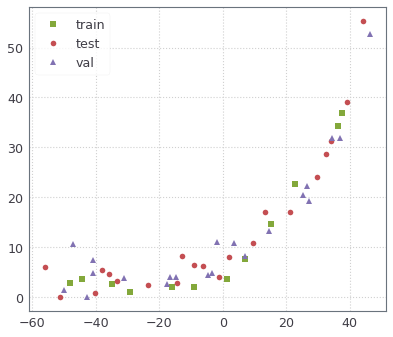

In [43]:
plt.plot(Xtrain, ytrain, 'gs', label='train')
plt.plot(Xtest, ytest, 'ro', label='test')
plt.plot(Xval, yval, 'm^', label='val')
plt.legend();

## Linear fit w. regulraization on polynomial features

Terms:  ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6']
Coeffs:  [ 6.87   4.085  3.873  2.218  2.341  1.197]
Train score: 0.950
Validation score: 0.957


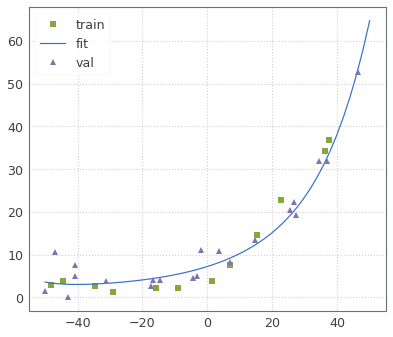

In [44]:
degree = 6;
alpha = 2.6;
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scale', StandardScaler()),
    ('ridge', Ridge(alpha=alpha, fit_intercept=True))
])
model.fit(Xtrain, ytrain)
print 'Terms: ', model.named_steps.poly.get_feature_names()
print 'Coeffs: ', model.named_steps['ridge'].coef_[0].round(3)
Xplot = np.linspace(-50, 50, 50).reshape(-1, 1)
yplot = model.predict(Xplot)

plt.plot(Xtrain, ytrain, 'gs', label='train')
plt.plot(Xplot, yplot, label='fit')
#plt.plot(Xtest, ytest, 'rx', label='test')
plt.plot(Xval, yval, 'm^', label='val')
plt.legend();
print 'Train score: %.3f' % model.score(Xtrain, ytrain)
print 'Validation score: %.3f' % model.score(Xval, yval)

### Combine data and prepare cv split

In [45]:
from sklearn.model_selection import PredefinedSplit

In [46]:
# combine training and validation sets
ntrain = Xtrain.shape[0]
nval = Xval.shape[0]
X = np.vstack([Xtrain, Xval])
y = np.vstack([ytrain, yval])
# Prepare split
test_fold = np.zeros(ntrain + nval)
test_fold[:ntrain] = -1  # -1 = training set, 0 = validation set
cv = PredefinedSplit(test_fold)#learning_curve()
#train_sizes_abs, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error')

## Learning curve for fixed parameters

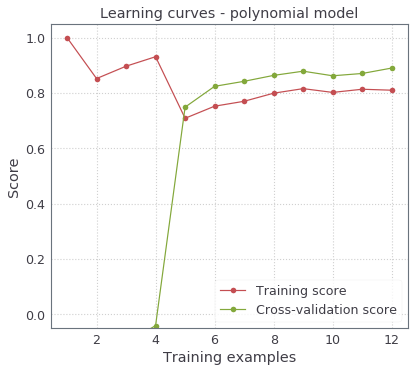

In [47]:
model.set_params(poly__degree=1, ridge__alpha=0)
#plot_learning_curve(model, 'Learning curves - linear model', X, y, cv=cv, train_sizes=np.linspace(.1, 1.0, 12));

model.set_params(poly__degree=8, ridge__alpha=10)
plot_learning_curve(model, 'Learning curves - polynomial model', X, y, cv=cv, train_sizes=np.linspace(.1, 1.0, 12), ylim=[-0.05, 1.05]);

## Validation curves and parameter optimization

In [48]:
from sklearn.model_selection import validation_curve

In [49]:
# combine training and validation sets
ntrain = Xtrain.shape[0]
nval = Xval.shape[0]
X = np.vstack([Xtrain, Xval])
y = np.vstack([ytrain, yval])
# Prepare split
test_fold = np.zeros(ntrain + nval)
test_fold[:ntrain] = -1  # -1 = training set, 0 = validation set
cv = PredefinedSplit(test_fold)#learning_curve()
train_scores, test_scores = validation_curve(model, X, y, cv=cv, 
                                              param_name='ridge__alpha', 
                                              param_range=np.logspace(-3, 3, 7))
print np.hstack([train_scores, test_scores])

[[ 0.9986162   0.88418668]
 [ 0.99720698  0.78786391]
 [ 0.99437891  0.90192695]
 [ 0.97490048  0.94725266]
 [ 0.81001593  0.89001415]
 [ 0.2730904   0.30359197]
 [ 0.03997806  0.02820561]]


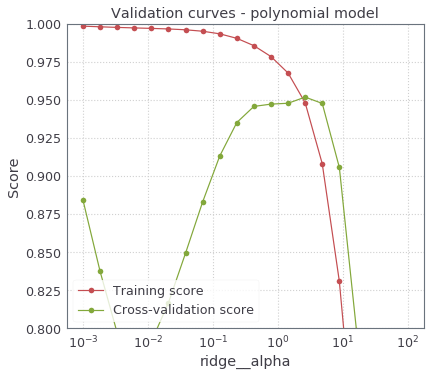

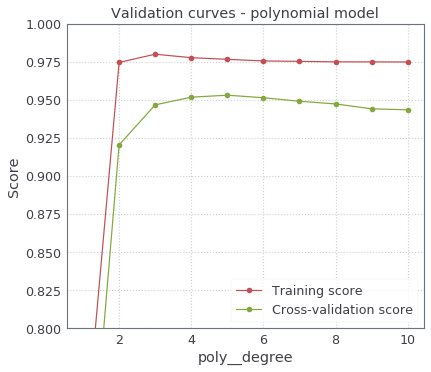

In [50]:
model.set_params(poly__degree=8, ridge__alpha=1)
plot_validation_curve(model, 'Validation curves - polynomial model', X, y, cv=cv, 
                      param_name='ridge__alpha', param_range=np.logspace(-3, 2, 20),
                      ylim=[0.8, 1], xscale='log');

model.set_params(poly__degree=8, ridge__alpha=1)
plot_validation_curve(model, 'Validation curves - polynomial model', X, y, cv=cv, 
                      param_name='poly__degree', param_range=range(1, 10+1),
                      ylim=[0.8, 1], xscale='linear');

### Now, we choose optimal parameter automatically

#### Grid Search

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = dict(
    poly__degree=range(1, 10+1),
    ridge__alpha=np.logspace(-3, 2, 20)
)
cvsearch = GridSearchCV(model, param_grid, cv=cv, verbose=1)
cvsearch.fit(X, y);

Fitting 1 folds for each of 200 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.4s finished


In [53]:
cv_report(cvsearch.cv_results_, n_top=1)

Model with rank: 1
Train score: 0.949 (std: 0.000)
Validation score: 0.957 (std: 0.000)
Parameters: {'poly__degree': 6, 'ridge__alpha': 2.6366508987303581}



#### Random Search

In [54]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [55]:
param_distr = dict(
    poly__degree=stats.randint(1, 11),
    ridge__alpha=stats.expon()
)
cvsearch = RandomizedSearchCV(model, param_distr, cv=cv, n_iter=50, verbose=1)
cvsearch.fit(X, y);

Fitting 1 folds for each of 50 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


In [56]:
cv_report(cvsearch.cv_results_, n_top=1)

Model with rank: 1
Train score: 0.962 (std: 0.000)
Validation score: 0.958 (std: 0.000)
Parameters: {'poly__degree': 5, 'ridge__alpha': 1.9352501682272349}



#### Plot best estimator

degree: 5, alpha: 1.94
Train score: 0.958
Validation score: 0.962


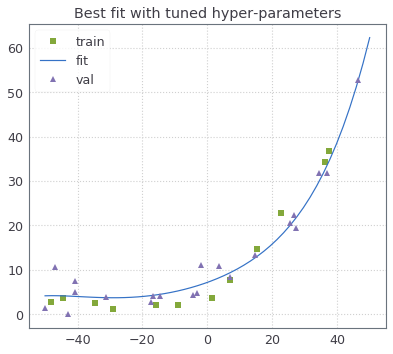

In [57]:
model_tuned = cvsearch.best_estimator_
print 'degree: %d, alpha: %.2f'  \
            % (model_tuned.get_params()['poly__degree'], model_tuned.get_params()['ridge__alpha'])
Xplot = np.linspace(-50, 50, 50).reshape(-1, 1)
yplot = model_tuned.predict(Xplot)

plt.plot(Xtrain, ytrain, 'gs', label='train')
plt.plot(Xplot, yplot, label='fit')
#plt.plot(Xtest, ytest, 'rx', label='test')
plt.plot(Xval, yval, 'm^', label='val')
plt.legend();
plt.title('Best fit with tuned hyper-parameters')
print 'Train score: %.3f' % model_tuned.score(Xtrain, ytrain)
print 'Validation score: %.3f' % model_tuned.score(Xval, yval)

# Ex 6: Support Vector Machines (SVM)

## SVM on a simple dataset

In [58]:
file1 = basepath + 'ex6/ex6data1.mat'

In [59]:
data1 = loadmat(file1)
X = data1['X']
y = data1['y'].squeeze()
print 'Labels: ', np.unique(y)

Labels:  [0 1]


In [60]:
from sklearn.svm import LinearSVC

In [61]:
degree = 1
C = .1
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)), 
    ('scale', StandardScaler()),
    ('LR', LinearSVC(C=C, fit_intercept=True))
])
model.fit(X, y)
score = model.score(X, y)
print score

0.980392156863


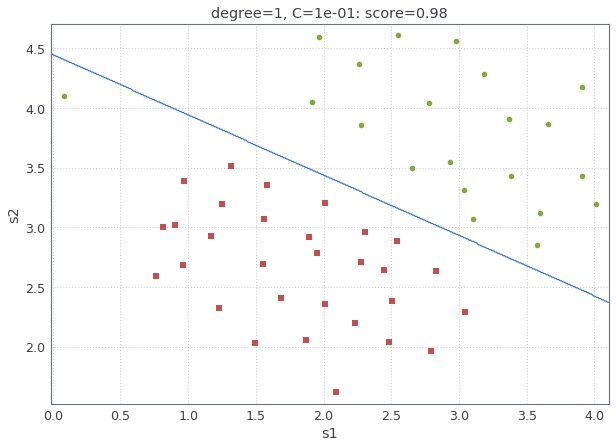

In [62]:
h = .01;
margin = 0.1
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
XX = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(XX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contour(xx, yy, Z, colors='b', levels=[0.5])
for label, style in zip([0, 1], ['rs', 'go']):
    idx = (y==label)
    plt.plot(X[idx, 0], X[idx, 1], style, label='%d' % label)
plt.xlabel('s1')
plt.ylabel('s2')
plt.title('degree=%d, C=%.0e: score=%.2f' % (degree, C, score));

## SVM with non-linear decision boundary

In [63]:
file2 = basepath + 'ex6/ex6data2.mat'

In [64]:
data1 = loadmat(file2)
X = data1['X']
y = data1['y'].squeeze()
print 'Labels: ', np.unique(y)

Labels:  [0 1]


In [65]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [66]:
# Note: LinearSVC + polynomial features not performing well
degree = 1
C = 1
gamma = 50
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)), 
    ('scale', StandardScaler()),
    ('svc', SVC(C=C, kernel='rbf', gamma=gamma))
])
model.fit(X, y)
score = model.score(X, y)
print score

1.0


In [67]:
param_distr = dict(
    svc__gamma=stats.expon(),
    svc__C=stats.expon()
)
cvsearch = RandomizedSearchCV(model, param_distr, n_iter=500, verbose=1, n_jobs=2)
cvsearch.fit(X, y);
cv_report(cvsearch.cv_results_, n_top=1)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=2)]: Done 395 tasks      | elapsed:    6.8s


Model with rank: 1
Train score: 0.998 (std: 0.001)
Validation score: 0.861 (std: 0.135)
Parameters: {'svc__gamma': 4.9948406942031562, 'svc__C': 3.1056316491467091}



[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:   20.2s finished


In [68]:
model_tuned = cvsearch.best_estimator_
print model_tuned.score(X, y)

0.997682502897


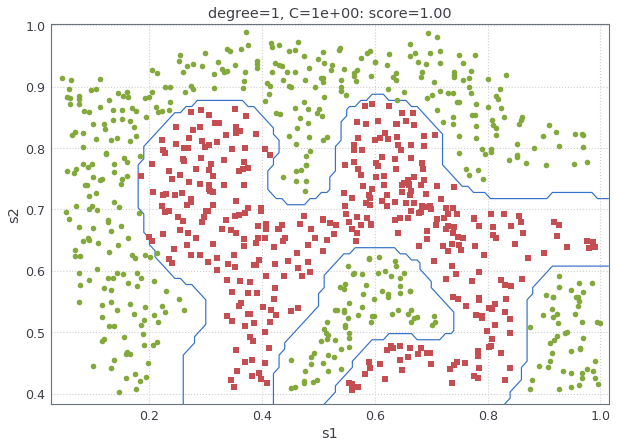

In [69]:
h = .01;
margin = 0.02
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
XX = np.c_[xx.ravel(), yy.ravel()]
Z = model_tuned.predict(XX)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contour(xx, yy, Z, colors='b', levels=[0.5])
for label, style in zip([0, 1], ['rs', 'go']):
    idx = (y==label)
    plt.plot(X[idx, 0], X[idx, 1], style, label='%d' % label)
plt.xlabel('s1')
plt.ylabel('s2')
plt.title('degree=%d, C=%.0e: score=%.2f' % (degree, C, score));

## SVM for text classification
The aim here is to train a spam classifier. I am going to go beyond the original excercise in several ways:
- using the full corpus from http://spamassassin.apache.org/old/publiccorpus/ 
- using `python` packages such as `email` and `nltk`
- combining these with the `sklearn` API for feature extraction http://scikit-learn.org/stable/modules/feature_extraction.html 
- training classifier with 

In [71]:
import tarfile
import email
import nltk
#nltk.download()
from BeautifulSoup import BeautifulSoup as BS

### Define import helpers

In [72]:
cp = basepath+'ex6/publiccorpus'
files = [os.path.join(cp, f) for f in os.listdir(cp)]
def msgs_from_tar(f):
    # yield individual messages from a tar file
    tar = tarfile.open(f)
    if 'spam' in f:
        label = 1
    else:
        label = 0
    for member in tar.getmembers():
        if member.isfile():
            yield tar.extractfile(member).read(), label

def all_msgs():
    for f in files:
        for msg, l in msgs_from_tar(f):
            yield msg, l
            
def msg_to_text(msg):
    # Return body text; only for simple messages
    m = email.message_from_string(msg)
    if m.is_multipart():
        return None
    else:
        payload = m.get_payload()
        # remove non-ASCII chars
        return ''.join([x for x in payload if ord(x) < 128])

### Load dataset

In [73]:
%%time
training_set = [(msg_to_text(msg), label) for msg, label in all_msgs() if msg_to_text(msg)]

Wall time: 29.1 s


In [74]:
X, y = zip(*[(x, y) for x, y in training_set])
X = np.array(X)
y = np.array(y)

In [75]:
print 'Total messages: %d, spam messages: %d' % (len(y), sum(y))
nn = sum(x is None for x in X)
print 'Messages with attachments etc.: %d' % nn

Total messages: 9800, spam messages: 3186
Messages with attachments etc.: 0


### Build pipeline to tokenize and vectorize msg body

In [76]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV

In [77]:
stemmer = nltk.PorterStemmer()
def stem(s):
    return ' '.join([stemmer.stem(w) for w in s.split()])
print stem('learning something new every day')

learn someth new everi day


In [79]:
%%time
max_features = 5000
C = 1
model = Pipeline([
    ('vectorize', TfidfVectorizer(
        preprocessor=stem,
        token_pattern=r'[a-z]+',
        max_features=max_features)
    ), 
    ('svc', LinearSVC(C=C))
])
model.fit(X, y)
score = model.score(X, y)
print score

0.999285714286
Wall time: 1min 24s


#### Look into prediction model

In [80]:
vec = model.named_steps['vectorize']
svc = model.named_steps['svc']

In [81]:
print svc.coef_.shape
print len(vec.get_feature_names())

(1L, 5000L)
5000


In [82]:
word_order = [(w, c) for w, c in zip(vec.get_feature_names(), svc.coef_[0])]

In [83]:
word_order = sorted(word_order, key=lambda x: abs(x[1]), reverse=True)

In [84]:
word_order[:20]

[(u'cnet', -2.4000956034532388),
 (u'lockergnome', -2.1956844014879899),
 (u'you', 2.0883701370820495),
 (u'ate', -2.0339872500935403),
 (u'zdnet', -1.9312065250730657),
 (u'wrote', -1.8823688715139919),
 (u'remov', 1.8109833480370789),
 (u'your', 1.6832187367114335),
 (u'money', 1.5382607456169979),
 (u'newsisfree', -1.5381352487981519),
 (u'clickthru', -1.5297126213112782),
 (u'subject', 1.4626844608573102),
 (u'our', 1.4443347765155301),
 (u'webmake', 1.352383903995408),
 (u'z', 1.3290818027846203),
 (u'hina', 1.2878654027585585),
 (u'e', 1.2797491439546986),
 (u'ree', 1.2764944791479989),
 (u'a', -1.2402191550960078),
 (u'org', -1.2332303697431679)]

In [85]:
test1 = """
One (technical) point regarding the safety e-mail: while most of it is prefilled when you click on "Send safety e-mail", this only applies to the time you first send it: so when someone drops out/joins in *after* the safety e-mail had been sent already, you should go to "Send safety email" again, update the text, and resend it. (Alternatively, you can also reply-all to the copy of the safety e-mail you got, but then that's not reflected on the CUYC website.)

Re crew list on the website: I believe Conor sorted out the accounts correctly, but the new crew isn't actually listed on the event page, and the old crew isn't set to cancelled - might be worth updating that just so people's history pages are in order.
"""

test2="""
Good Day,



Your phone was out of reach today, so i decided to contact you by email about this pas due invoice below. please get back to me on this issue promptly.

Payment # 8002226 issue:
http://bytesoftware.com.br/Invoice-976512151/


Yours Truly,
"""

In [86]:
model.predict([test1, test2])

array([0, 1])

### ToDo: CV and parameter search
- vocabulary size, C, ...
- pre-processing, ...

# Ex 7: K-means and PCA

## K-means

In [87]:
from sklearn.cluster import KMeans, SpectralClustering

In [88]:
data = loadmat(basepath+'ex7/ex7data2.mat')
X = data['X']

In [89]:
y = KMeans(n_clusters=3).fit_predict(X)

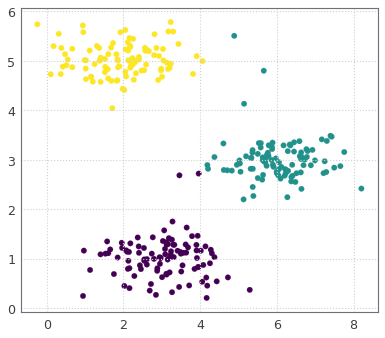

In [90]:
plt.scatter(X[:,0], X[:,1], c=y)

## K-mean image compression

In [91]:
from scipy.misc import imread

In [92]:
img = imread(basepath+'ex7/bird_small.png')
print img.shape

(128L, 128L, 3L)


In [93]:
X = img.reshape(-1, 3)
K = 16
Kfit = KMeans(n_clusters=K).fit(X)
centers = Kfit.cluster_centers_.astype(np.uint8)
y = Kfit.predict(X)
X_K = np.array([centers[label] for label in y])
img_K = X_K.reshape(img.shape)

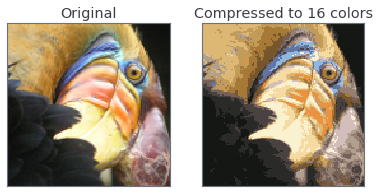

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Original')
ax2.imshow(img_K)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Compressed to %d colors' % K)

In [95]:
# visualize color
import plotly
print plotly.__version__
plotly.offline.init_notebook_mode()
import plotly.offline as py
import plotly.graph_objs as go

2.0.5


In [96]:
colors = ['rgb(%d, %d, %d)' % (r, g, b) for (r, g, b) in X]
colors_K = ['rgb(%d, %d, %d)' % (r, g, b) for (r, g, b) in X_K]
data = [
    go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2],
                     mode='markers',
                     marker=dict(size=2, color=colors) ),
]
data_K = [
    go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2],
                     mode='markers',
                     marker=dict(size=2, color=colors_K) ),
]
layout = go.Layout(
    title = 'Image colorspace compressed via K-means clustering',
    scene=dict(
        xaxis=dict(title='R', titlefont=dict(color='red'), tickfont=dict(color='red')),
        yaxis=dict(title='G', titlefont=dict(color='green'), tickfont=dict(color='green')),
        zaxis=dict(title='B', titlefont=dict(color='blue'), tickfont=dict(color='blue')),
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig = go.Figure(data=data, layout=layout)
fig_K = go.Figure(data=data_K, layout=layout)
#py.iplot(fig)
py.iplot(fig_K)

In [104]:
from sklearn.decomposition import PCA

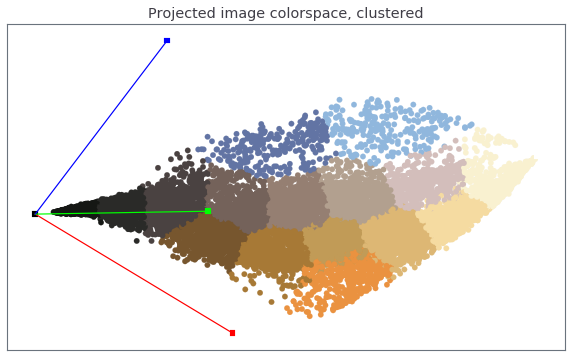

In [105]:
pca = PCA(n_components=2)
pca.fit(X)
X_2d = pca.transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=X_K/255.)
special_colors = np.array([
    [0,0,0],
    [1,1,1],
    [1,0,0],
    [0,1,0],
    [0,0,1]
])
special_points = 255*special_colors
special_points_2d = pca.transform(special_points)
plt.scatter(special_points_2d[:, 0], special_points_2d[:, 1], c=special_colors, marker='s')
blk = special_points_2d[0]
for pt, clr in zip(special_points_2d[2:], special_colors[2:]):
    lx = [blk[0], pt[0]]
    ly = [blk[1], pt[1]]
    plt.plot(lx, ly, c=clr)
    
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.title('Projected image colorspace, clustered')

In [106]:
pca.explained_variance_ratio_.sum()

0.99324885392163209

In [107]:
pca.components_.shape

(2L, 3L)

## PCA

In [108]:
data = loadmat(basepath+'ex7/ex7data1.mat')
X = data['X']

In [109]:
from sklearn.decomposition import PCA

[[-0.76908153 -0.63915068]
 [-0.63915068  0.76908153]]
[ 3.98926528  5.00280585]


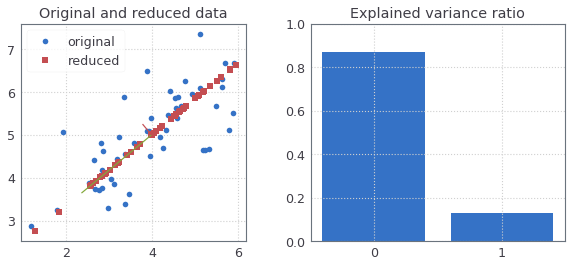

In [110]:
pca = PCA()
pca_red = PCA(n_components=1)
pca.fit(X)
pca_red.fit(X)
X_red = pca_red.inverse_transform(pca_red.transform(X))
# prepare pc vectors for plotting
print pca.components_
print pca.mean_

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes[0]
ax.plot(X[:,0], X[:,1], 'o', label='original')
ax.plot(X_red[:,0], X_red[:,1], 'rs', label='reduced')
ax.legend()
for vec, ev in zip(pca.components_, pca.explained_variance_):
    start = pca.mean_
    end = pca.mean_ + vec*ev
    ax.plot(*zip(start, end))
ax.set_aspect('equal')
ax.set_title('Original and reduced data')

ax = axes[1]
ax.bar([0, 1], pca.explained_variance_ratio_)
ax.set_title('Explained variance ratio')
ax.set_ylim([0, 1])
ax.set_xticks([0, 1]);

## PCA for dimensionality reduction on face images

In [111]:
def show_random_faces(X, how_many=16, idx=None, seed=None):
    # helper function to plot a specified or random subset of faces
    np.random.seed(seed)
    if idx is None:
        idx = np.random.choice(len(X), how_many)
    X = np.array(X)
    subset = X[idx,:]
    #_, subset = np.meshgrid(np.linspace(0, 0, 400), np.linspace(0, 1, 4))
    side = int(np.sqrt(subset.shape[1]))
    n_samples = subset.shape[0]
    grid_side = int(np.ceil(np.sqrt(n_samples)))
    grid_sides = (grid_side, grid_side)
    image_sides = (grid_sides[0]*side, grid_sides[1]*side)
    n_grid = grid_sides[0] * grid_sides[1]
    if n_samples < n_grid:
        subset = np.vstack([subset, np.zeros((n_grid - n_samples, subset.shape[1]))])
    subset = subset.reshape((grid_sides[0], grid_sides[1], side, side)).swapaxes(1, 2).reshape((image_sides[0], image_sides[1])).T
    plt.imshow(subset, cmap=plt.cm.Greys_r)
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])

(5000L, 1024L)


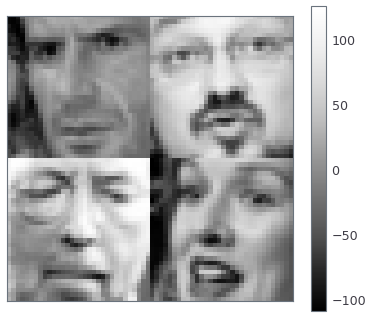

In [112]:
data = loadmat(basepath+'ex7/ex7faces.mat')
X = data['X']
print X.shape
show_random_faces(X, how_many=4)

In [113]:
%%time
pca = PCA()
pca.fit(X)

Wall time: 2.32 s


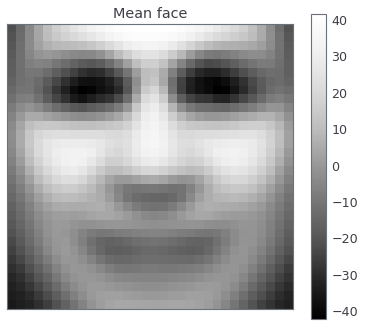

In [114]:
show_random_faces([pca.mean_], 1)
plt.title('Mean face')

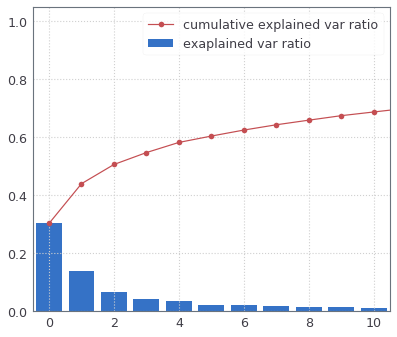

In [115]:
plt.bar(range(pca.n_features_), pca.explained_variance_ratio_, label='exaplained var ratio')
plt.plot(range(pca.n_features_), pca.explained_variance_ratio_.cumsum(), 'r-o', label='cumulative explained var ratio')
plt.xlim(-0.5, 10.5)
plt.legend();

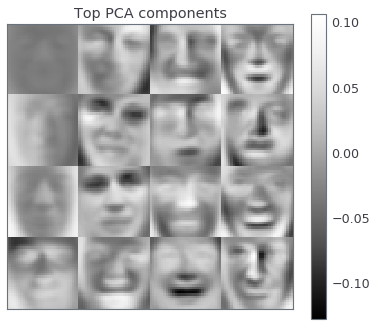

In [116]:
show_random_faces(pca.components_, how_many=16, idx=range(16))
plt.title('Top PCA components');

In [117]:
%%time
pca2 = PCA(n_components=100)
pca2.fit(X)

Wall time: 1.08 s


In [118]:
Xr = pca2.inverse_transform(pca2.transform(X))

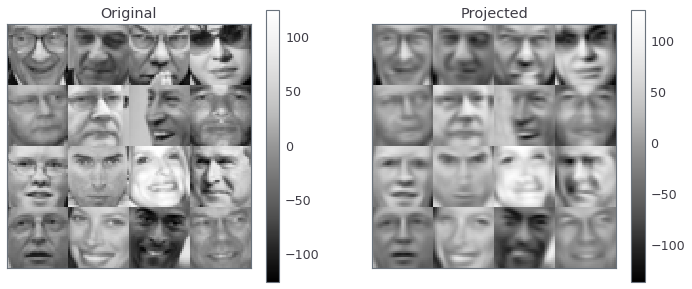

In [119]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Original')
show_random_faces(X, how_many=16, idx=range(16))
plt.subplot(1,2,2)
show_random_faces(Xr, how_many=16, idx=range(16))
plt.title('Projected')

# Ex 8: Anomaly Detection/Recommender Systems

## Anomaly detection
We have an unlabelled training set (with outliers present), and a labelled validation set with outliers labelled.

Ideas for method selection:
http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html

Also, KDE-based method (closest to the one proposed in the course): http://scikit-learn.org/stable/modules/mixture.html#gmm

Potential problem with KDE-based method is the lack of robustness to outliers in the training set, as shown in http://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html

In [120]:
data1 = loadmat(basepath+'ex8/ex8data1.mat')
data2 = loadmat(basepath+'ex8/ex8data2.mat')

In [121]:
# Hacky way to get vars into workspace
from numpy import array, uint8
for k, v in sorted(data1.iteritems()):
    if k.startswith('__'):
        continue
    print '%-10s %s' % (k, np.shape(v))
    exec('%s = %r' % (k, v))
Xtrain = X
yval = yval.astype(int)

X          (307L, 2L)
Xval       (307L, 2L)
yval       (307L, 1L)


In [122]:
# cast into standard sklearn cv problem
from sklearn.model_selection import PredefinedSplit

ntrain = Xtrain.shape[0]
nval = Xval.shape[0]
ytrain = np.zeros((ntrain, 1))
X = np.vstack([Xtrain, Xval])

# Input: 0 = inlier, 1 = outlier
# Output: 1 = inlier, -1 = outlier
ytrain[ytrain==1] = -1
yval[yval==1] = -1

ytrain[ytrain==0] = 1
yval[yval==0] = 1

y = np.vstack([ytrain, yval])
# Prepare split
test_fold = np.zeros(ntrain + nval)
test_fold[:ntrain] = -1  # -1 = training set, 0 = validation set

cv = PredefinedSplit(test_fold)

### Using robust covariance estimation + elliptic envelope
`EllipticEnvelope`: the only free parameter is the contamination in the original unlabelled dataset

`EllipticEnvelope.predict()` returns -1 for outliers and +1 for inliers

#### Score for CV/parameter tuning
Different averaging schemes for the `f1` score/precision/recall etc.

In [123]:
from sklearn.covariance import EllipticEnvelope, MinCovDet
from sklearn.model_selection import GridSearchCV

In [124]:
model = EllipticEnvelope()
param_grid = dict(
    contamination=np.linspace(0, 0.1, 50)
)
cvsearch = GridSearchCV(model, param_grid, cv=cv, scoring='f1', verbose=1, n_jobs=2)
cvsearch.fit(X, y);

Fitting 1 folds for each of 50 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    6.6s finished


Model with rank: 1
Train score: 0.992 (std: 0.000)
Validation score: 0.997 (std: 0.000)
Parameters: {'contamination': 0.014285714285714287}

Model with rank: 1
Train score: 0.992 (std: 0.000)
Validation score: 0.997 (std: 0.000)
Parameters: {'contamination': 0.016326530612244899}



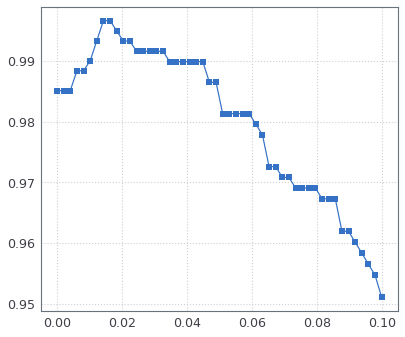

In [125]:
cv_report(cvsearch.cv_results_, n_top=1)
plt.plot(param_grid['contamination'], cvsearch.cv_results_['mean_test_score'], 's-');

In [126]:
model = cvsearch.best_estimator_
model.fit(Xtrain)
xx, yy = np.meshgrid(np.linspace(0, 30), np.linspace(0, 30))
XX = np.c_[xx.ravel(), yy.ravel()]
ZZ = model.decision_function(XX).reshape(xx.shape)

In [127]:
from sklearn import metrics

fval = model.predict(Xval)
for avg in ['binary', 'micro', 'macro', 'weighted']:
    print 'f1_%s = %.3f' % (avg, metrics.f1_score(yval, fval, average=avg))

f1_binary = 0.997
f1_micro = 0.993
f1_macro = 0.936
f1_weighted = 0.993


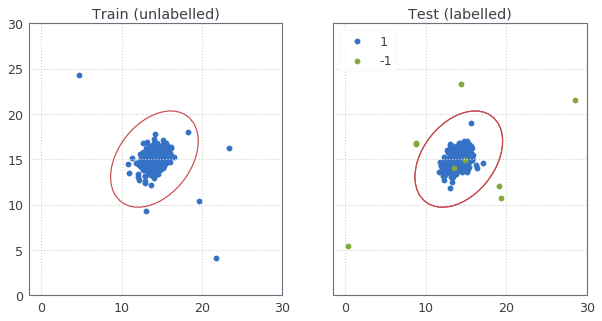

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax = axes[0]
ax.scatter(Xtrain[:,0], Xtrain[:, 1]);
ax.set_title('Train (unlabelled)')
ax.contour(xx, yy, ZZ, levels=[0], colors='r')

ax = axes[1]
for label in [1, -1]:
    ax.scatter(Xval[yval[:,0]==label,0], Xval[yval[:,0]==label, 1], label=label)
    ax.contour(xx, yy, ZZ, levels=[0], colors='r')
ax.legend(loc=2)
ax.set_title('Test (labelled)');